## Reto 1: Boxplots

### 1. Objetivos:
    - Aprender a graficar e interpretar boxplots utilizando Seaborn
    - Aprender a lidiar con valores atípicos usando IQR-Score
 
---
    
### 2. Desarrollo:

#### a) Usando boxplots para analizar la distribución de nuestros datos

Vamos a hacer algunas gráficas de boxplot y describirlas en equipo. Usa Seaborn para generar gráficas boxplot de los siguientes datasets y columnas:

1. Dataset: 'near_earth_objects-jan_feb_1995-clean.csv'
    - Columnas a graficar: 'estimated_diameter.meters.estimated_diameter_max' y 'relative_velocity.kilometers_per_second'
2. Dataset: 'new_york_times_bestsellers-clean.json'
    - Columnas a graficar: 'price.numberDouble'
3. Dataset: 'melbourne_housing-clean.csv'
    - Columnas a graficar: 'land_size'
    
> Para conocer más detalles acerca de estos datasets, ve a Datasets/Readme.md y visita los links de las fuentes de donde provienen. Es una gran idea hacer esto para que entiendas el contexto alrededor de los análisis que vamos a estar realizando.
    
Realiza estas 4 visualizaciones y comenta con la experta y tus compañeros qué conclusiones o hipótesis podemos hacer sobre nuestros datos. Para profundizar en el análisis puedes obtener también el rango, la mediana, el valor mínimo y máximo, el percentil 25 y el percentil 75. De esta manera tendrás valores concretos con los que realizar tu análisis.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Dataset Earth

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto near_earth_objects-jan_feb_1995-clean.csv')
df1.head()

,Unnamed: 0,id,name,is_potentially_hazardous_asteroid,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,close_approach_date,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour
0,0,2154652,154652 (2004 EP20),False,483.676488,1081.533507,1995-01-07,789467580000,Earth,16.142864,58114.308667
1,1,3153509,(2003 HM),True,96.506147,215.794305,1995-01-07,789491340000,Earth,12.351044,44463.757734
2,2,3516633,(2010 HA),False,44.111820,98.637028,1995-01-07,789446820000,Earth,6.220435,22393.567277
3,3,3837644,(2019 AY3),False,46.190746,103.285648,1995-01-07,789513900000,Earth,22.478615,80923.015021
4,4,3843493,(2019 PY),False,22.108281,49.435619,1995-01-07,789446700000,Earth,4.998691,17995.288355


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


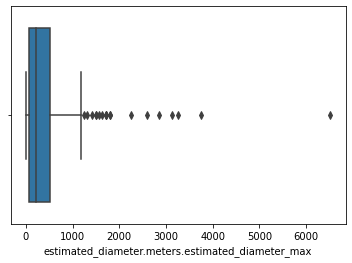

In [6]:
sns.boxplot(df1['estimated_diameter.meters.estimated_diameter_max'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


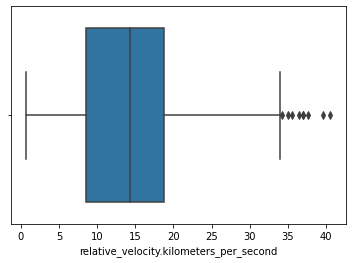

In [7]:
sns.boxplot(df1['relative_velocity.kilometers_per_second'])

Dataframe: Bestsellers

In [9]:
df2 = pd.read_json('/content/drive/MyDrive/Remoto Datasets/Remoto new_york_times_bestsellers-clean.json')
df2.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


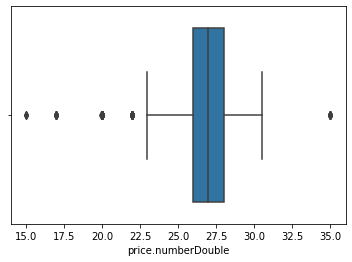

In [10]:
sns.boxplot(df2['price.numberDouble'])

Dataset Melbourne

In [11]:
df3 = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto melbourne_housing-clean.csv')
df3.head()

,Unnamed: 0,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


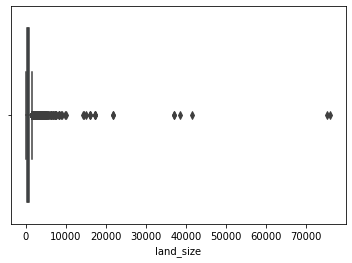

In [12]:
sns.boxplot(df3['land_size'])

#### b) Eliminando valores atípicos

A partir de las visualizaciones que realizaste en el punto anterior, decide en cuáles columnas tenemos valores atípicos que pueden estorbarnos en nuestro análisis. Elimina dichos valores atípicos usando el Score de Rango Intercuartílico. Puedes probar variando un poco la medida del Score (1.5 * IQR) para eliminar solamente los valores que tú consideras como extremos.

Para observar los cambios a detalle, obtén la mediana, la media y la desviación estándar de tus datos *antes* y *después* de eliminar los valores atípicos. Compara estos valores y explica qué es lo que está pasando.

Grafica de nuevo tus datos sin valores atípicos para compararlos con las gráficas anteriores.

Comenta con la experta y tus compañeros tus hallazgos.

Dataframe Earth

In [19]:
df1['estimated_diameter.meters.estimated_diameter_max'].describe()

count     333.000000
mean      410.086042
std       614.691592
min         2.978791
25%        62.235757
50%       215.794305
75%       517.654482
max      6516.883822
Name: estimated_diameter.meters.estimated_diameter_max, dtype: float64

In [13]:
# Tu código va aquí
iqr = df1['estimated_diameter.meters.estimated_diameter_max'].quantile(.75)-df1['estimated_diameter.meters.estimated_diameter_max'].quantile(.25)
filtro_inferior = df1['estimated_diameter.meters.estimated_diameter_max'] > df1['estimated_diameter.meters.estimated_diameter_max'].quantile(.25)-(iqr*1.5)
filtro_superior = df1['estimated_diameter.meters.estimated_diameter_max'] < df1['estimated_diameter.meters.estimated_diameter_max'].quantile(.75)+(iqr*1.5)

In [15]:
df_filtrado1 = df1[filtro_inferior & filtro_superior]

In [20]:
df_filtrado1['estimated_diameter.meters.estimated_diameter_max'].describe()

count     314.000000
mean      297.202205
std       292.320047
min         2.978791
25%        59.434687
50%       196.806745
75%       450.858206
max      1185.877909
Name: estimated_diameter.meters.estimated_diameter_max, dtype: float64

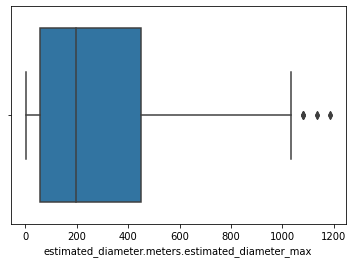

In [16]:
sns.boxplot(x=df_filtrado1['estimated_diameter.meters.estimated_diameter_max'])

In [23]:
df1['relative_velocity.kilometers_per_second'].describe()

count    333.000000
mean      14.984228
std        7.995994
min        0.681437
25%        8.599443
50%       14.257166
75%       18.782546
max       40.527428
Name: relative_velocity.kilometers_per_second, dtype: float64

In [21]:
iqr = df1['relative_velocity.kilometers_per_second'].quantile(.75)-df1['relative_velocity.kilometers_per_second'].quantile(.25)
filtro_inferior = df1['relative_velocity.kilometers_per_second'] > df1['relative_velocity.kilometers_per_second'].quantile(.25)-(iqr*1.5)
filtro_superior = df1['relative_velocity.kilometers_per_second'] < df1['relative_velocity.kilometers_per_second'].quantile(.75)+(iqr*1.5)

In [22]:
df_filtrado2 = df1[filtro_inferior & filtro_superior]

In [25]:
df_filtrado2['relative_velocity.kilometers_per_second'].describe()

count    324.000000
mean      14.373121
std        7.193906
min        0.681437
25%        8.454582
50%       14.043307
75%       18.349862
max       33.931711
Name: relative_velocity.kilometers_per_second, dtype: float64

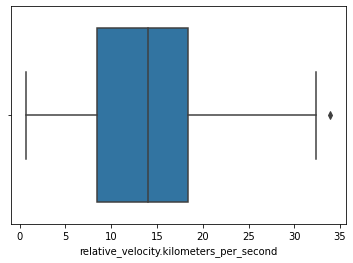

In [26]:
sns.boxplot(x=df_filtrado2['relative_velocity.kilometers_per_second'])

Dataset Bestsellers

In [27]:
df2['price.numberDouble'].describe()

count    3033.000000
mean       26.818368
std         1.787720
min        14.990000
25%        25.950000
50%        26.950000
75%        27.990000
max        34.990000
Name: price.numberDouble, dtype: float64

In [28]:
iqr = df2['price.numberDouble'].quantile(.75)-df2['price.numberDouble'].quantile(.25)
filtro_inferior = df2['price.numberDouble'] > df2['price.numberDouble'].quantile(.25)-(iqr*1.5)
filtro_superior = df2['price.numberDouble'] < df2['price.numberDouble'].quantile(.75)+(iqr*1.5)

In [29]:
df_filtrado3 = df2[filtro_inferior & filtro_superior]

In [30]:
df_filtrado3['price.numberDouble'].describe()

count    2950.000000
mean       26.949634
std         1.334044
min        22.950000
25%        25.950000
50%        26.990000
75%        27.990000
max        30.500000
Name: price.numberDouble, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


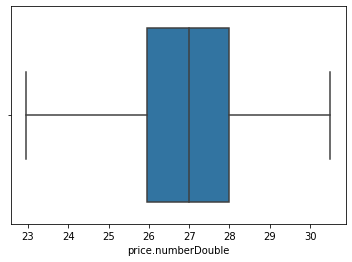

In [31]:
sns.boxplot(df_filtrado3['price.numberDouble'])

Dataset Melbourne

In [32]:
df3['land_size'].describe()

count    11646.000000
mean       554.458097
std       1460.432326
min          0.000000
25%        162.000000
50%        412.000000
75%        656.000000
max      76000.000000
Name: land_size, dtype: float64

In [33]:
iqr = df3['land_size'].quantile(.75)-df3['land_size'].quantile(.25)
filtro_inferior = df3['land_size'] > df3['land_size'].quantile(.25)-(iqr*1.5)
filtro_superior = df3['land_size'] < df3['land_size'].quantile(.75)+(iqr*1.5)

In [34]:
df_filtrado4 = df3[filtro_inferior & filtro_superior]

In [35]:
df_filtrado4['land_size'].describe()

count    10934.000000
mean       393.322115
std        290.902164
min          0.000000
25%        151.000000
50%        368.000000
75%        622.000000
max       1396.000000
Name: land_size, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


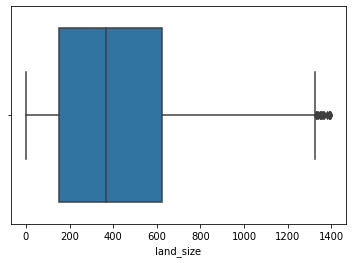

In [36]:
sns.boxplot(df_filtrado4['land_size'])